In [12]:
# Get path right
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\GaussianProcess")

import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Import GP interpolation module
from GEGP import GEGP

%matplotlib inline

In [13]:
X_train=np.array([0,0.1,0.2,0.4,0.6,1]).reshape(-1,1)
y_train =((6*X_train-2)**2)*np.sin(12*X_train-4)
grad_train = 12*(6*X_train-2)*np.sin(12*X_train-4) + \
    ((6*X_train-2)**2)*np.cos(12*X_train-4)*12;

In [15]:
GEGP = GEGP()

In [17]:
GEGP.fit(X_train, y_train, grad_train)

In [21]:
GEGP.__dict__

{'n_restarts': 20,
 'opt': 'L-BFGS-B',
 'init_point': None,
 'verbose': False,
 'kernel': 'Gaussian',
 'trend': 'Const',
 'nugget': 1e-10,
 'X': array([[0. ],
        [0.1],
        [0.2],
        [0.4],
        [0.6],
        [1. ]]),
 'y': array([[ 3.02720998],
        [-0.65657677],
        [-0.63972711],
        [ 0.11477697],
        [-0.14943781],
        [15.82973195]]),
 'grad': array([[-49.53815369],
        [-16.53326853],
        [  9.37165426],
        [  4.78098612],
        [-31.78839907],
        [ 19.55318935]]),
 'diff_list': [array([[ 0. , -0.1, -0.2, -0.4, -0.6, -1. ],
         [ 0.1,  0. , -0.1, -0.3, -0.5, -0.9],
         [ 0.2,  0.1,  0. , -0.2, -0.4, -0.8],
         [ 0.4,  0.3,  0.2,  0. , -0.2, -0.6],
         [ 0.6,  0.5,  0.4,  0.2,  0. , -0.4],
         [ 1. ,  0.9,  0.8,  0.6,  0.4,  0. ]])],
 'PsiDot': array([[ 1.00000000e+00,  8.23036933e-01,  4.58856933e-01,
          4.43311697e-02,  9.01769782e-04,  3.48283130e-09,
          0.00000000e+00, -3.20579804

In [18]:
X_test = np.linspace(0, 1, 100).reshape(-1,1)
y_test = ((6*X_test-2)**2)*np.sin(12*X_test-4)

In [19]:
y_pred, y_pred_SSqr = GEGP.predict(X_test)

<ipython-input-20-1666756b6084>:6: RuntimeWarning: invalid value encountered in sqrt
  ax.fill_between(X_test.flatten(), y_pred-1.96*np.sqrt(y_pred_SSqr),
<ipython-input-20-1666756b6084>:7: RuntimeWarning: invalid value encountered in sqrt
  y_pred+1.96*np.sqrt(y_pred_SSqr),


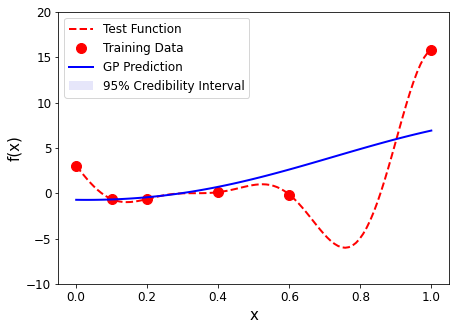

In [20]:
# Assess prediction results
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(X_test,y_test,'r--',linewidth=2,label='Test Function')
ax.plot(X_train,y_train,'ro',markerfacecolor='r', markersize=10, label='Training Data')
ax.plot(X_test,y_pred,'b-', lw=2, label='GP Prediction')
ax.fill_between(X_test.flatten(), y_pred-1.96*np.sqrt(y_pred_SSqr), 
                y_pred+1.96*np.sqrt(y_pred_SSqr),
                facecolor='lavender',label='95% Credibility Interval')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('f(x)', fontsize=15)
ax.set_ylim([-10,20])
ax.legend(loc="upper left",prop={'size': 12});